# Table of Contents
 <p><div class="lev1"><a href="#Display-data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Display data</a></div><div class="lev1"><a href="#Prep-data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prep data</a></div><div class="lev1"><a href="#Models"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></div><div class="lev2"><a href="#Linear-regression"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear regression</a></div><div class="lev2"><a href="#Logistic-regression"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic regression</a></div><div class="lev2"><a href="#Random-forest"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random forest</a></div><div class="lev1"><a href="#Display-results"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display results</a></div><div class="lev1"><a href="#Conclusion"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></div>

Requirements
- sklearn
- numpy
- pandas

`pip install sklearn numpy pandas`

here goes short description:

`todo`

In [1]:
import pandas as pd
import numpy as np

flies_df = pd.read_csv('measurements.csv')
flies_df = flies_df[['image', 'frame', 'pixel_counts', 'area', 'flies']]
X = flies_df[['pixel_counts', 'area']]
y = flies_df[['flies']]
data = flies_df[['pixel_counts', 'area', 'flies']]
data['sub_area'] = data['pixel_counts'] / data['area']

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
sns.set_context("notebook", font_scale=1.3)
pylab.rcParams['figure.figsize'] = (15.0, 8.0)
# General formatting
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14

# Display data

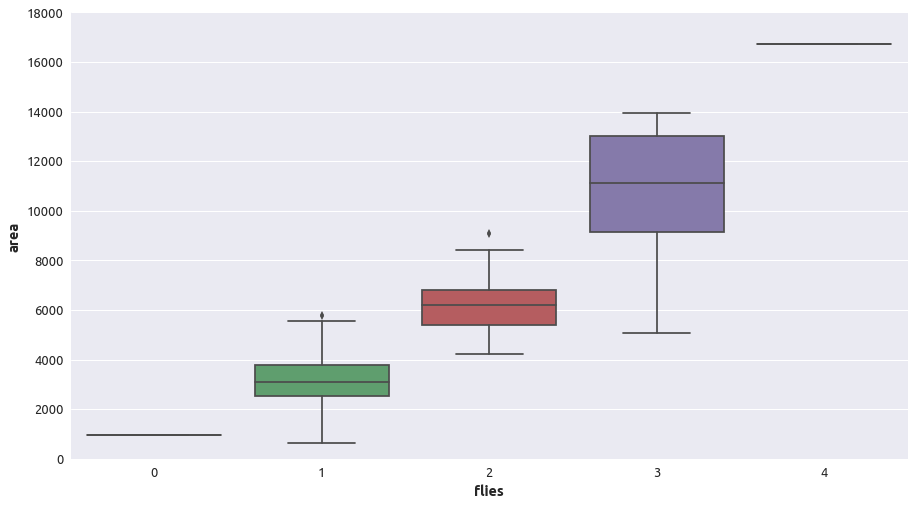

In [3]:
sns.boxplot(x=data['flies'], y=data['area']);

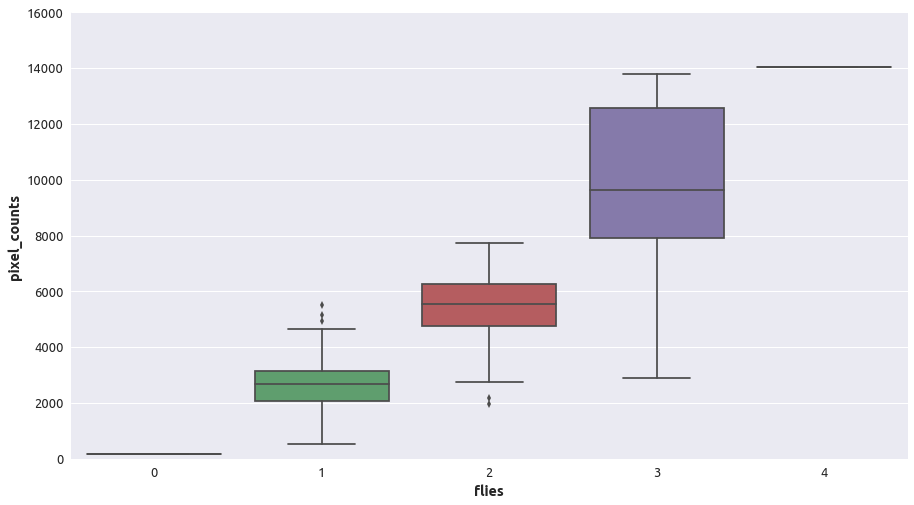

In [4]:
sns.boxplot(x=data['flies'], y=data['pixel_counts']);

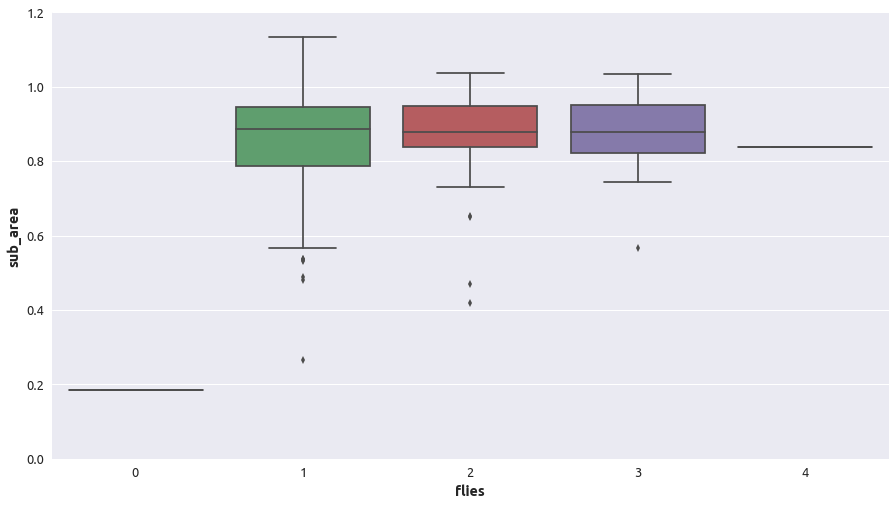

In [5]:
sns.boxplot(x=data['flies'], y=data['sub_area']);

number of flies = offset + coeff1 * number of bright pixels + coeff2 * area

# Prep data

In [6]:
from sklearn.preprocessing import normalize, scale

In [7]:
data['pixel_counts_norm'] = scale(data['pixel_counts'].values)
data['area_norm'] = scale(data['area'].values)

results = []  # model -> precision

features = ['pixel_counts', 'area']
norm_features = ['pixel_counts_norm', 'area_norm']

X = data[features].values
y = data[['flies']].values.ravel()
X_norm = data[norm_features].values

/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# Models
--------
lets rock

## Linear regression

In [8]:
from sklearn import linear_model
from sklearn.cross_validation import KFold, cross_val_score

In [9]:
total_errs = []
kf = KFold(len(X), n_folds=5)
for train_index, test_index in kf:
    regr = linear_model.LinearRegression()
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train, y_train)
    errs = regr.predict(X_test) - y_test
    total_errs.extend(errs)
precision = 1 - sum(abs(np.round(total_errs))) / len(total_errs)
results.append({'model': 'lin_regression', 'precision': precision})  # model -> score

##  Logistic regression

In [10]:
kf = KFold(len(X), n_folds=5)
logistic_regr = linear_model.LogisticRegression()
precision = cross_val_score(logistic_regr, X, y, cv=kf)
results.append({'model': 'log_regression', 'precision': np.mean(precision)})

In [11]:
kf = KFold(len(X), n_folds=5)
logistic_regr = linear_model.LogisticRegression()
precision = cross_val_score(logistic_regr, X_norm, y, cv=kf)
results.append({'model': 'log_regression_norm', 'precision': np.mean(precision)})

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
kf = KFold(len(X), n_folds=5)
rf = RandomForestClassifier()
precision = cross_val_score(rf, X, y, cv=kf)
results.append({'model': 'random_forest', 'precision': np.mean(precision)})

In [14]:
kf = KFold(len(X), n_folds=5)
rf = RandomForestClassifier()
precision = cross_val_score(rf, X_norm, y, cv=kf)
results.append({'model': 'random_forest_norm', 'precision': np.mean(precision)})

# Display results
------------

In [16]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('precision', ascending=False)
results_df

,model,precision
0,lin_regression,0.937811
4,random_forest_norm,0.935463
3,random_forest,0.932963
2,log_regression_norm,0.913056
1,log_regression,0.885648


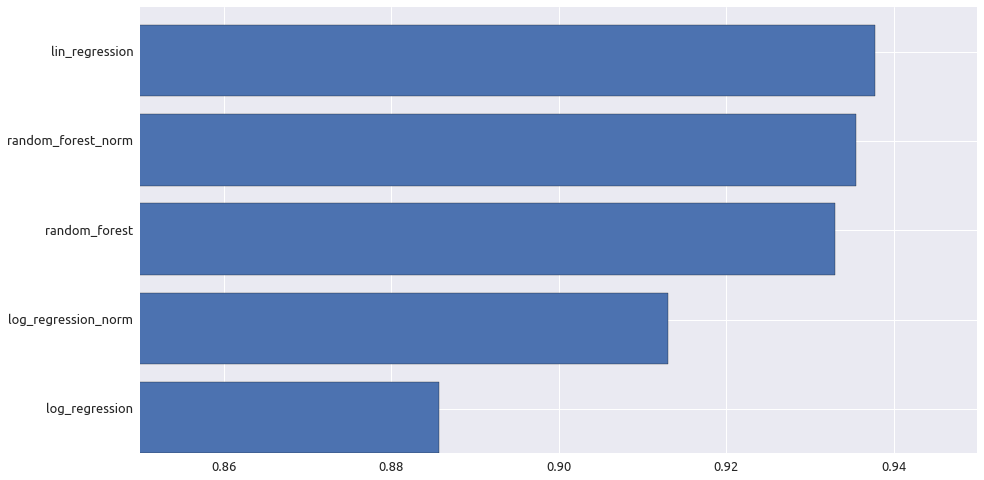

In [20]:
def hbarplot(df, x_name: str, y_name: str):
    df = df.copy()
    df.sort_values(y_name, inplace=True, ascending=True)
    ids = list(range(len(df)))
    plt.barh(ids, df[y_name])
    new_idx = [idx + 0.5 for idx in ids]
    plt.yticks(new_idx, df[x_name])
    
hbarplot(results_df, 'model', 'precision')
plt.xlim(0.85, 0.95);

# Conclusion
----------

**Linear regression for the win. **

I wrote very dirty baseline, and i think that 6% errors in this dataset is fine.

Why lin regression is so good? I dont know. Mb. try to tune other models. (none of them are tuned now)